In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from experiments.utils.smooth_running_mean import smooth_running_mean
from definitions import PROJECT_ROOT
import pickle

In [2]:
names_list = ['trio', 'quartet', 'quintet', 'sextet', 'septet', 'octet','nonet', 'decet',
               'duodecet','quindecet', 'vigintet','trigintet','quinquagintet']
ntet_sizes = [3,4,5,6,7,8,9,10,12,15,20,30,50]
base_path = Path(PROJECT_ROOT).joinpath('experiments/stochastic_ntet_descent/result_data')
file_names= ['coil20','rna N3k', '3d cube of 30^3 points - 3000 points sampled']

In [3]:
#cube
all_sizes_results = np.zeros((len(ntet_sizes), 4, 6)) # 3 for - time, initial stress, final stress, average quartet stress
path_to_file =  Path(base_path).joinpath(file_names[2])

all_results  =[]
for i in range(3):
    path_to_file =  Path(base_path).joinpath(file_names[i])
    all_sizes_results = np.zeros((len(ntet_sizes), 4, 6))
    all_results.append(all_sizes_results )
    for i, name in enumerate(names_list):
        # based on the results I changed the way I wanted to present the data so there is some overwriting etc
        results_file = Path(path_to_file).joinpath(f'Stochastic {name} ({ntet_sizes[i]}) descent.npy')
        results = np.load(results_file)
        all_sizes_results[i,0,:] = results[:,0,None].T # time
        all_sizes_results[i,1,:] = results[:,1,None].T # init stress
        all_sizes_results[i,2,:] = results[:,2,None].T # final stress
        all_sizes_results[i,3,:] = results[:,3,None].T # average quartet stress






# for i, name in enumerate(names_list):
#     layout_path = Path(path_to_file).joinpath(f'Stochastic {name} ({ntet_sizes[i]}) descent.pickle')
#
#     with open(layout_path, 'rb') as file:
#         layouts = pickle.load(file)
#
#     initial_stress_mean = 0
#     final_stress_mean = 0
#     for layout in layouts:
#         initial_stress = layout.collected_metrics["Stress"][1][0]
#         initial_stress_mean += initial_stress
#         final_stress = layout.get_final_stress()
#         final_stress_mean += final_stress
#
#     initial_stress_mean /=6
#     final_stress_mean /=6







In [4]:
print(all_sizes_results)

[[[5.35158553e+01 5.36115392e+01 5.34797378e+01 5.33060257e+01
   5.31445726e+01 5.93031926e+01]
  [4.42949147e-01 4.42949147e-01 4.42949147e-01 4.42949147e-01
   4.42949147e-01 4.42949147e-01]
  [4.87418882e-01 4.73990308e-01 4.86010930e-01 4.81723519e-01
   4.77770132e-01 4.82634827e-01]
  [7.62668262e-03 7.35716067e-03 7.41363764e-03 7.51865961e-03
   7.50201705e-03 7.47564289e-03]]

 [[4.43245170e+01 4.48446428e+01 4.43442906e+01 4.43113775e+01
   4.43855396e+01 5.07438316e+01]
  [4.42949147e-01 4.42949147e-01 4.42949147e-01 4.42949147e-01
   4.42949147e-01 4.42949147e-01]
  [2.16034773e-01 2.15706782e-01 2.15747437e-01 2.15933845e-01
   2.15717773e-01 2.15899889e-01]
  [5.38779369e-03 5.40628675e-03 5.39578136e-03 5.35762491e-03
   5.35536793e-03 5.34795027e-03]]

 [[4.03411901e+01 4.03127705e+01 4.03869719e+01 4.01648982e+01
   4.03874090e+01 4.67834773e+01]
  [4.42949147e-01 4.42949147e-01 4.42949147e-01 4.42949147e-01
   4.42949147e-01 4.42949147e-01]
  [3.27941632e-01 3.275544

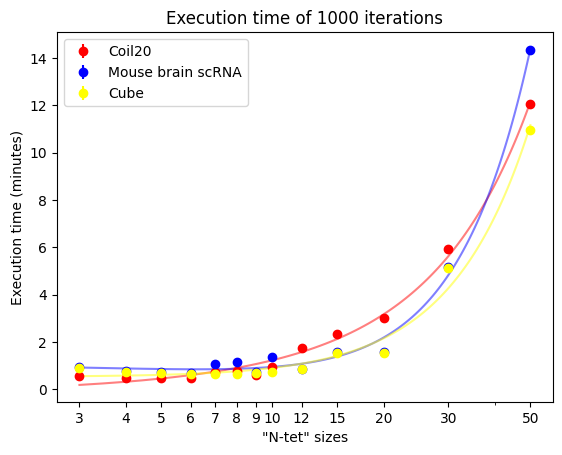

In [5]:
# plot times
import matplotlib
fig, ax = plt.subplots()

line1, line2, line3 = [], [], []
lines = [line1, line2, line3]

# print(all_sizes_results[:,0,:5])

dataset_names = ['Coil20' , 'Mouse brain scRNA', 'Cube']
colours = ["r", 'b', 'yellow']

for i, results_arr in enumerate(all_results):
    results = results_arr[:,0,:5]/60
    means_time = np.mean(results, axis=1)
    max_time = (np.max(results, axis=1) - means_time)[None,:]
    min_time = means_time - np.min(results, axis=1)[None,:]
    lines[i] = ax.errorbar(ntet_sizes, means_time, yerr=np.concatenate((min_time,max_time), axis=0), fmt='o', c=colours[i], label=dataset_names[i])

    quadratic_fit = np.polyfit(ntet_sizes, means_time, 2)
    x = np.linspace(3,50,100)
    ax.plot(x, quadratic_fit[2] + quadratic_fit[1]*x +  quadratic_fit[0]*x**2, c=colours[i], alpha=0.5)


# stress_diffs = all_sizes_results[:,2,:] - all_sizes_results[:,1,:]
# means_stress_diff = np.mean(stress_diffs, axis=1)
# ranges_stress_diffs = np.max(stress_diffs, axis=1) - np.min(stress_diffs, axis=1)



labels = [l.get_label() for l in lines]
ax.legend(lines,labels)

# Add axis labels and title
ax.set_xlabel('\"N-tet\" sizes')
ax.set_ylabel('Execution time (minutes)')

ax.set_title('Execution time of 1000 iterations')
plt.xscale('log')
ax.set_xticks(np.array(ntet_sizes), map(str, ntet_sizes))
plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


# Show the plot
plt.show()


[-0.33614084 -0.20380757 -0.08672641 -0.02017478  0.00545564  0.01425994
  0.0174294   0.01857141  0.01893312  0.01777455  0.01333406  0.00591331
  0.00146209]
[3.83889227 2.582858   1.33976972 0.56519708 0.24336346 0.12600898
 0.08085541 0.06163572 0.04776648 0.04230263 0.03777224 0.02365075
 0.00752047]
[-0.03864229  0.22710906  0.11543753  0.0460478   0.0243492   0.01772842
  0.01557643  0.01489853  0.01483315  0.01452279  0.01019031  0.00373076
  0.00083925]


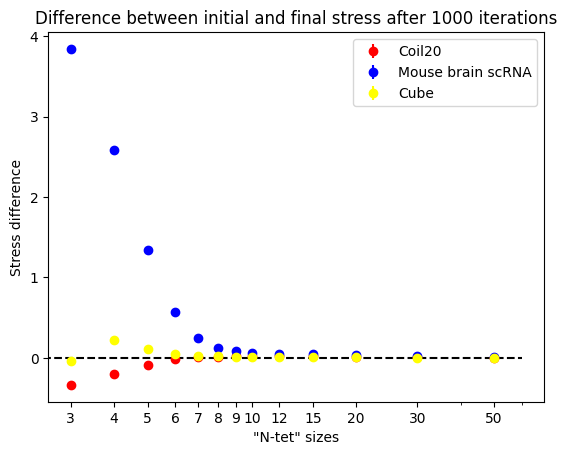

In [10]:
# differences init - final

import matplotlib
fig, ax = plt.subplots()

line1, line2, line3 = [], [], []
lines = [line1, line2, line3]

dataset_names = ['Coil20' , 'Mouse brain scRNA', 'Cube']
colours = ["r", 'b', 'yellow']


for i, results_arr in enumerate(all_results):

    diffs =  (results_arr[:,1,:]) - (results_arr[:,2,:])
    means_diffs = np.mean(diffs, axis=1)
    print(means_diffs)
    max_diff = (np.max(diffs, axis=1) - means_diffs)[None,:]
    min_diff = means_diffs - np.min(diffs, axis=1)[None,:]
    lines[i] = ax.errorbar(ntet_sizes, means_diffs, yerr=np.concatenate((max_diff,min_diff), axis=0), fmt='o', c=colours[i], label=dataset_names[i])

labels = [l.get_label() for l in lines]
ax.legend(lines,labels)

ax.set_xlabel('\"N-tet\" sizes')
ax.set_ylabel('Stress difference')
ax.set_title('Difference between initial and final stress after 1000 iterations')
plt.xscale('log')
ax.set_xticks(np.array(ntet_sizes), map(str, ntet_sizes))
plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.hlines(y=0, xmin=0, xmax=60, colors='black', linestyles='--')


# Show the plot
plt.show()



# line2 = ax2.errorbar(ntet_sizes, init_stress, yerr=init_stress_ranges, fmt='o', c='b', label='Stress init')
# line3 = ax2.errorbar(ntet_sizes, final_stress, yerr=final_stress_ranges, fmt='o', c='y', label='Stress final')

# ax2 = ax.twinx()
# ax2.set_ylabel("Stress")